<a href="https://colab.research.google.com/github/KrishnaTSasi/CODEALPHA_4/blob/main/Code_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES PREDICTION USING PYTHON

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [ ]:
# Drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

 Distribution of Sales

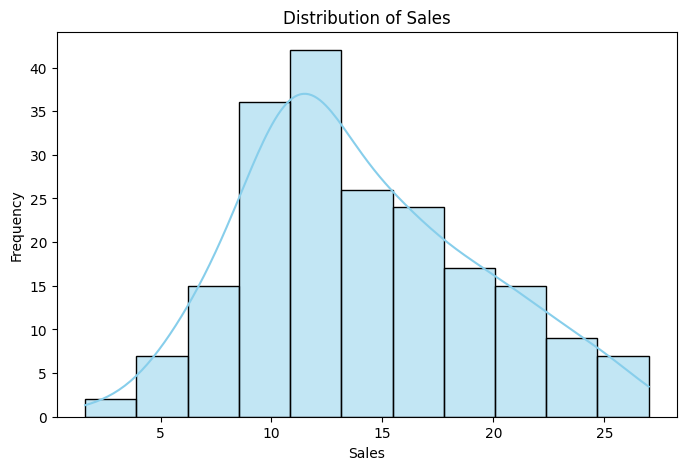

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Scatter Plots

TV vs Sales

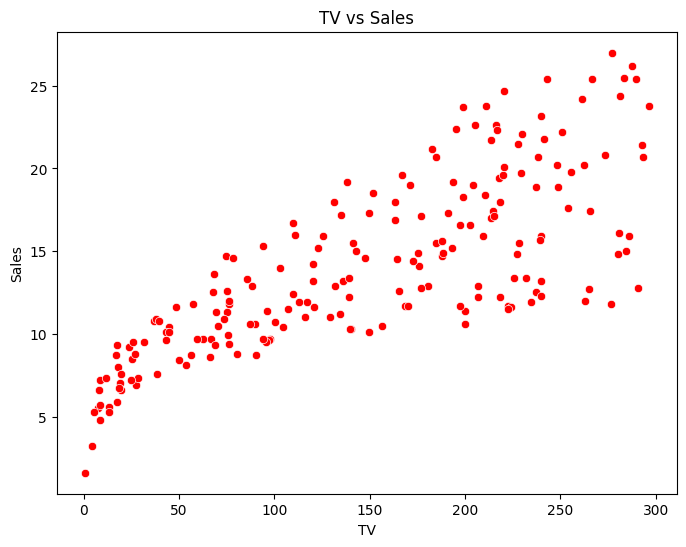

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='TV',y='Sales',color='red')
plt.title("TV vs Sales")
plt.show()

RADIO VS SALES

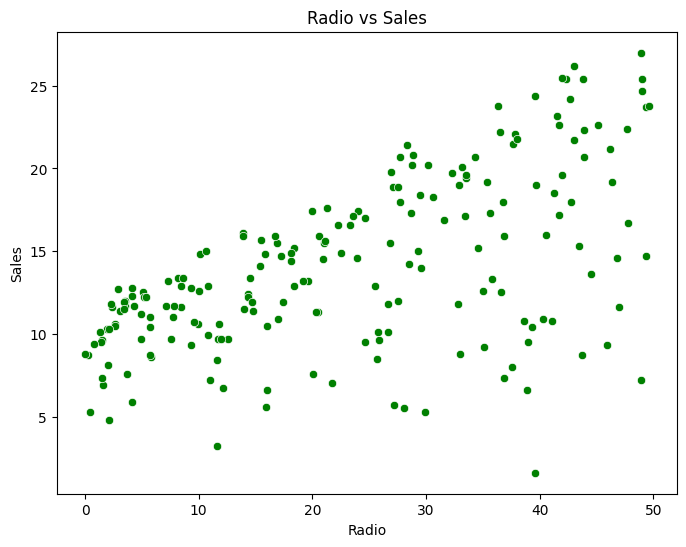

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Radio',y='Sales',color='green')
plt.title("Radio vs Sales")
plt.show()

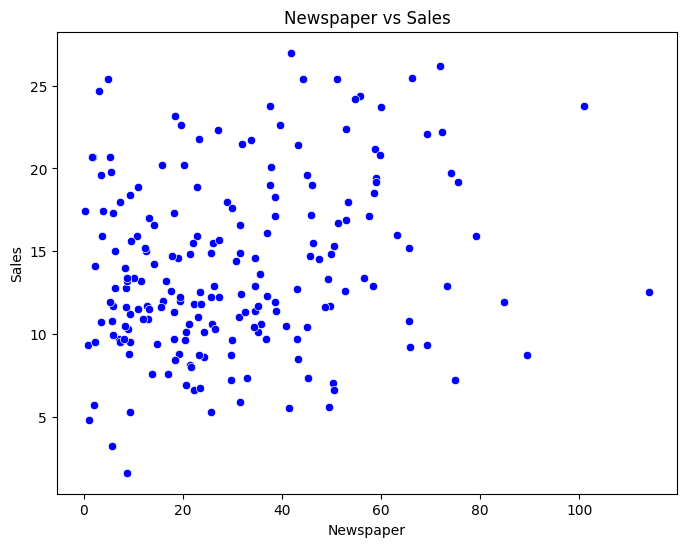

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Newspaper',y='Sales',color='blue')
plt.title("Newspaper vs Sales")
plt.show()

In [ ]:
# Add Date column assuming daily entries
df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='D')

In [ ]:
# Sort by date
df.sort_values('Date', inplace=True)

Time Series Chart for Sales

In [ ]:
# line plot using plotly
import plotly.express as px
fig = px.line(df, x='Date', y='Sales', title='Time Series of Sales Over Time')
fig.update_traces(mode="lines+markers")
fig.update_layout(xaxis_title='Date', yaxis_title='Sales')
fig.show()

SALES AND ADVERTISING SPEND OVER TIME

In [ ]:
import plotly.express as px
fig = px.line(df, x='Date', y=['Sales', 'TV', 'Radio', 'Newspaper'],
              title='Sales and Advertising Spend Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Value')
fig.show()

Forecasting Sales Using Prophe

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmh5sfc1_/09427eqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmh5sfc1_/0w4u7lkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22059', 'data', 'file=/tmp/tmpmh5sfc1_/09427eqg.json', 'init=/tmp/tmpmh5sfc1_/0w4u7lkw.json', 'output', 'file=/tmp/tmpmh5sfc1_/prophet_model135g3_4v/prophet_model-20250802115736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


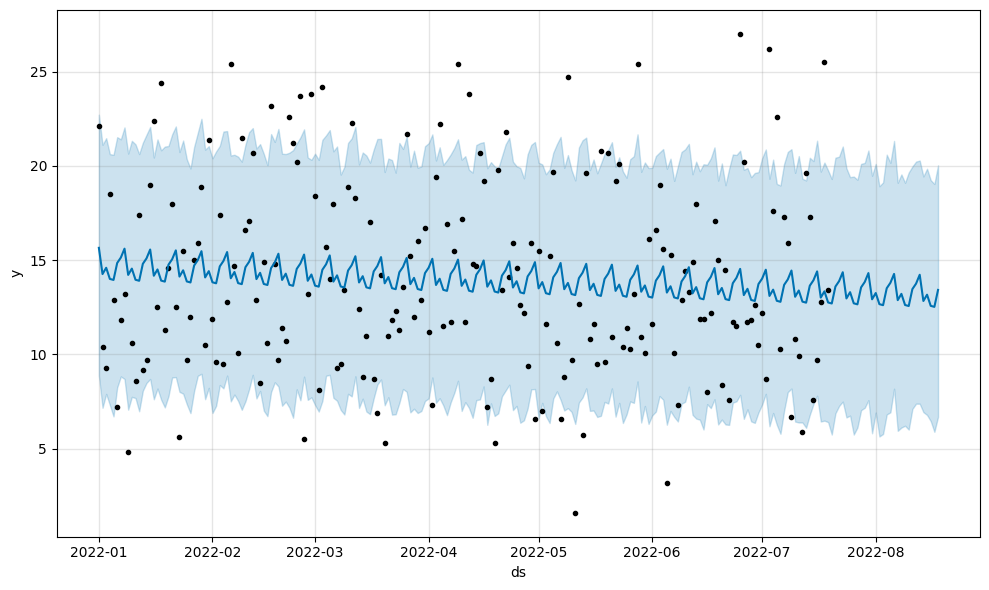

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

# Create and fit the model
model = Prophet()
model.fit(df_prophet)

# Create future dates (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)

Interactive Forecast using Plotly

In [ ]:
fig = px.line(forecast, x='ds', y='yhat', title='Forecasted Sales')
fig.add_scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='lines', name='Actual Sales')
fig.show()

Decompose Time Series

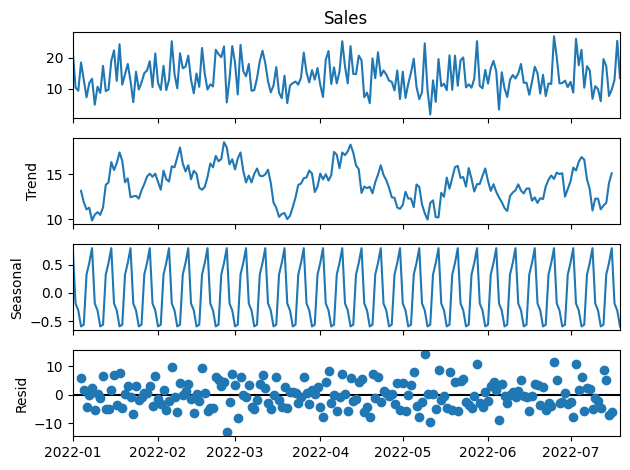

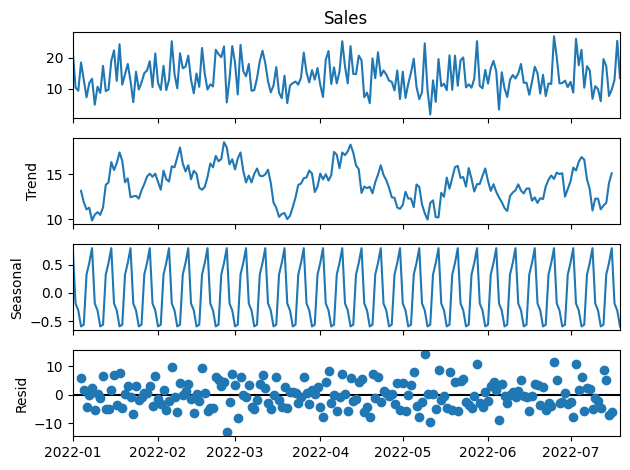

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Sales'], model='additive', period=7)
result.plot()

Visualize Outliers Using Boxplots

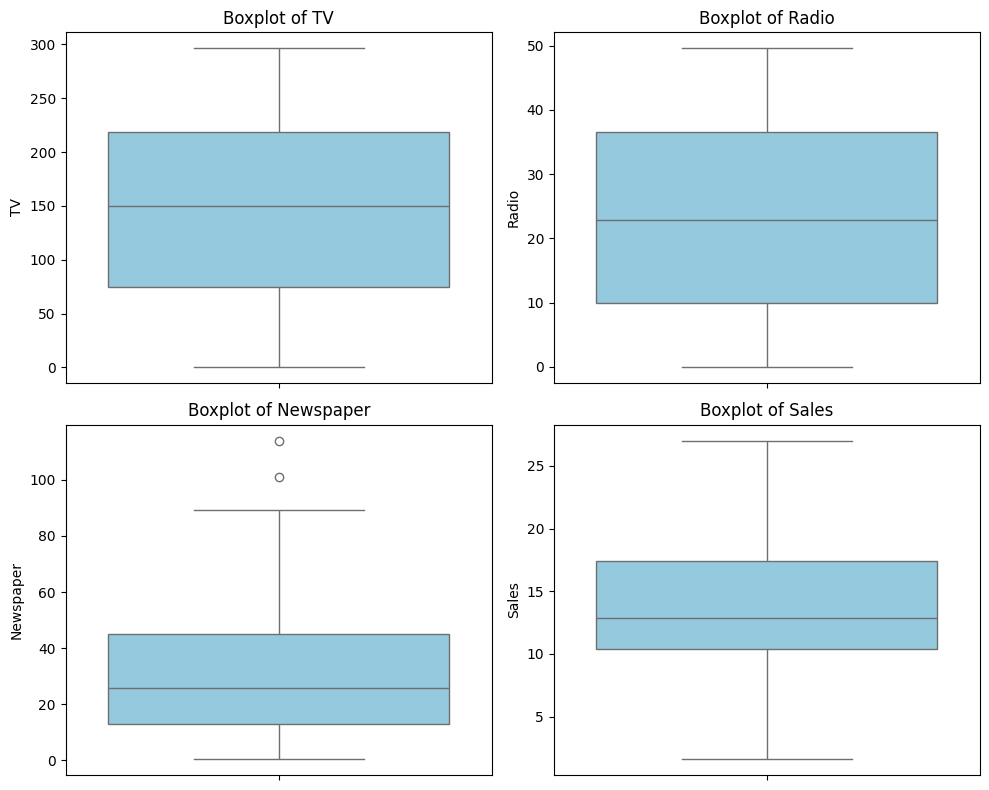

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(10, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Correlation Heatmap

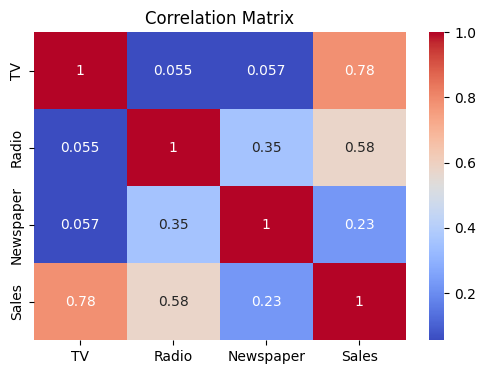

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Select Features and target

In [ ]:
x = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                       # Target

Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Models Training and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R2 Score": r2}

In [ ]:
print("Model Performance:\n")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}\n")

Model Performance:

Linear Regression:
  MSE: 3.1741
  R2 Score: 0.8994

Ridge Regression:
  MSE: 3.1741
  R2 Score: 0.8994

Lasso Regression:
  MSE: 3.1705
  R2 Score: 0.8996

Decision Tree:
  MSE: 2.1750
  R2 Score: 0.9311

Random Forest:
  MSE: 0.5907
  R2 Score: 0.9813

XGBoost:
  MSE: 0.8689
  R2 Score: 0.9725



 Visualization

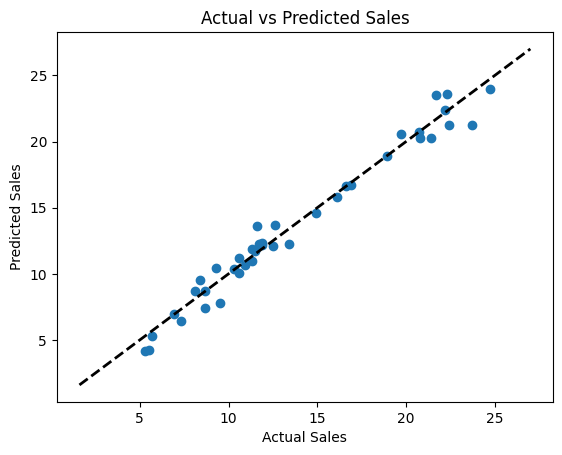

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()